(This notebook was adapted from the notebook at https://github.com/Emergent-Behaviors-in-Biology/mlreview_notebooks/blob/master/NB1_CII-ML_is_difficult.ipynb)

## First machine learning example

Perhaps the simplest example of machine learning is a computer fitting some data to a function (the **model**).
This is actually an example of **regression** because the fitted function can be used later to predict values given some input.

We will start by fitting some data to polynomials of different order.
We will also investigate some limitations and scaling features of the regression.

## The Prediction Problem

Consider some process that gives rise to a data set $(x,y)$.
We call this *labeled data* because we know the $x$ and $y$ values for each pair.
In this case, the data are generated by drawing samples from a known linear equation
$$
    y_i= f(x_i) + s_i,
$$
where $f(x_i)$ is some fixed, but (possibly unknown) function, and $s_i$ is a Gaussian, uncorrelated noise variable such that
$$
\langle s_i \rangle=0 \\
\langle s_i \eta_j \rangle = \delta_{ij} \sigma
$$
We will refer to the $f(x_i)$ as the **true features** used to generate the data.
(Of course the Gaussian noise is known only as a function, not as specific $s_i$.)

To make a prediction (hence the term "regression"), we will need to create and learn a model function $g_\alpha(x;\theta_\alpha)$ that depends on some parameters $\theta_\alpha$. This function (which is actually a set of functions, each with different parameters) respresents the **model class** that we are using to try to model the data and make predictions.
The $g_\alpha(x;\theta_\alpha)$ encode the class of **features** we are using to represent the data.

For all supervised machine learning algorithms, we will learn the parameters $\boldsymbol{\theta}$, by training the models on a **training data set** and then test the effectiveness of the model on a <i>different</i> dataset, the **test data set**.
The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.
As we will see below, models that give the best fit to the training data do not necessarily make the best predictions on the test data.
In fact, it is common that the models which perform best on the "in-training data" actually perform worst on the "out-of-training data," presumably because the model learns the fluctuations of the in-training data too closely.
This will be a running theme that we will encounter repeatedly in machine learning.
It is related to the **bias-variance tradeoff**.

For the remainder of this notebook, we will focus on linear and polynomial regression.
To repeat: the goal is to model the data with polynomials and make predictions about the new data that we have not seen.

In the examples below we consider 2 model classes:
<ul>
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 1 (aka linear models),
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 3,
</ul>

We will learn our parameters by fitting our training dataset and then making predictions on our test data set.
One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$.
A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$
*Exercise* :How is this quantity different from the $\chi^2$ function used to assess fit quality?

We will return to this in later notebooks. For now, we will try to get a qualitative picture by examining plots on test and training data.

## Fitting vs. predicting when the data is in the model class

We start by considering the case:
$$
f(x)=2x.
$$
Then the data is clearly generated by a model that is contained within all model classes we are using to make predictions (linear models and third order polynomials).

Run the code for the following cases:
<ul>
<li> For $f(x)=2x$, $N_{\text{train}}=10$ and $\sigma=0$ (noiseless case), train the classes of models (linear, third-order polynomial) for a training set when $x_i  \in [0,1]$.
Make graphs comparing fits for different order of polynomials.
Which model fits the data the best?
<li> Do you think that the data that has the least error on the training set will also make the best predictions? Why or why not? Can you try to discuss and formalize your intuition? What can go right and what can go wrong?
<li>Check your answer by seeing how well your fits predict newly generated test data (including on data outside the range you fit on, for example $x \in [0,1.2]$) using the code below. How well do you do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
<li>Repeat the exercises above for $f(x)=2x$, $N_{\text{train}}=10$, and $\sigma=1$. What changes?
<li>Repeat the exercises above for $f(x)=2x$, $N_{\text{train}}=100$, and $\sigma=1$. What changes?
<li> Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.
</ul>


In [1]:
# Adapted from https://github.com/Emergent-Behaviors-in-Biology/mlreview_notebooks/blob/master/NB1_CII-ML_is_difficult.ipynb
# Use Scikit-learn (sklearn) for this simple regression example
import numpy as np
from matplotlib import pyplot as plt, rcParams
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

This is the first training example: $N_\text{train}=10$ and $\sigma=0.$

It is a good idea to check the data, if possible, before proceeding. What is the shape of the training data $x$ and $y$? (How can you check it in Python?)

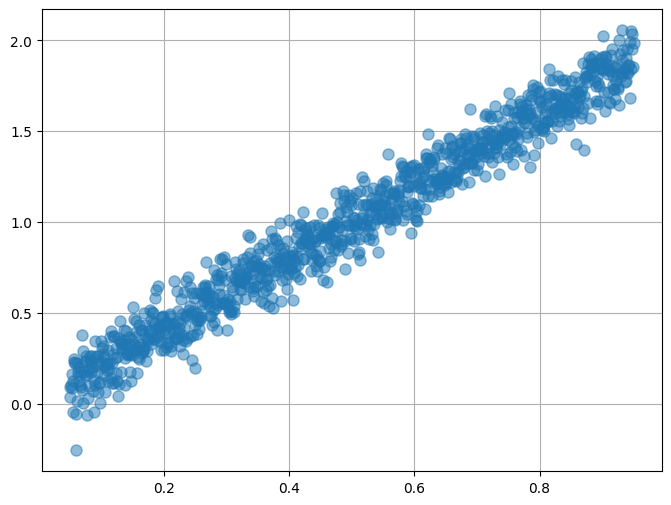

In [2]:
# Initialize the training data parameters
N_train=1000
sigma_train=0.1;

# Train in the domain [0,1]
x=np.linspace(0.05,0.95,N_train)
# Produce Gaussian random noise
s = sigma_train*np.random.randn(N_train)

# Define linear relation with noise
y=2*x+s

fig = plt.figure(figsize=(8, 6))
plt.grid()
p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')


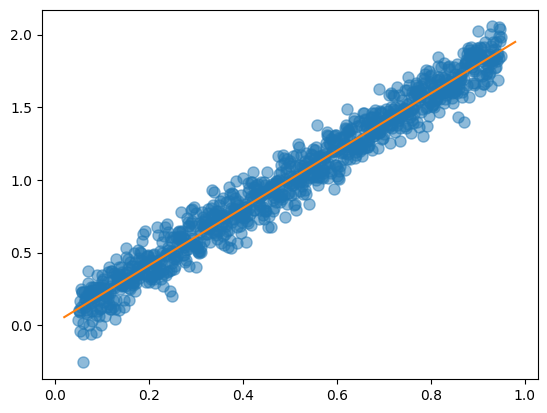

In [3]:
# Linear Regression : create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
clf.fit(x[:, np.newaxis], y)

# Use fitted linear model to predict the y value:
xplot=np.linspace(0.02,0.98,200) # grid of points
# Note: some are in the training set, some are not.
# The model has to learn to predict the y values for the out-of-set data
p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

For the polynomial regression, we have to use a slightly different class to construct the polynomial, but the `fit` function (the learning step) is the same.

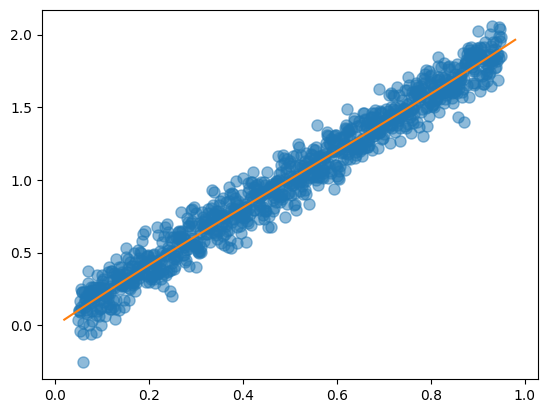

In [4]:
# Polynomial Regression
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(xplot[:,np.newaxis])
p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

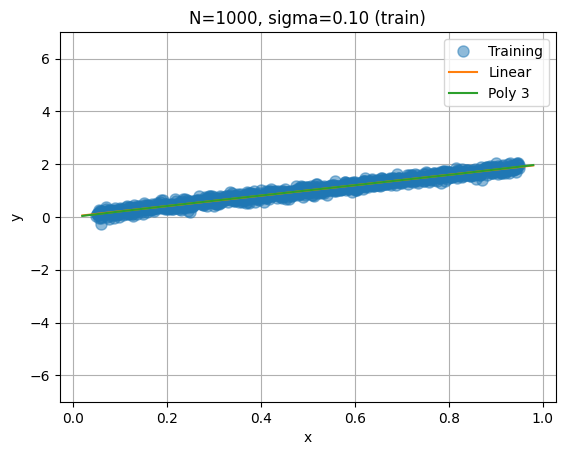

In [5]:
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, sigma=%.2f"%(N_train,sigma_train)
plt.title(Title+" (train)")

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

plt.legend(loc='best')

# Linear Filename
filename_train="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Saving figure and showing results
plt.savefig(filename_train)
plt.grid()
plt.show()

It's no surprise that the training matches the in-training-data sample. But what happens if you turn on the Gaussian noise?
Go back and try that now.

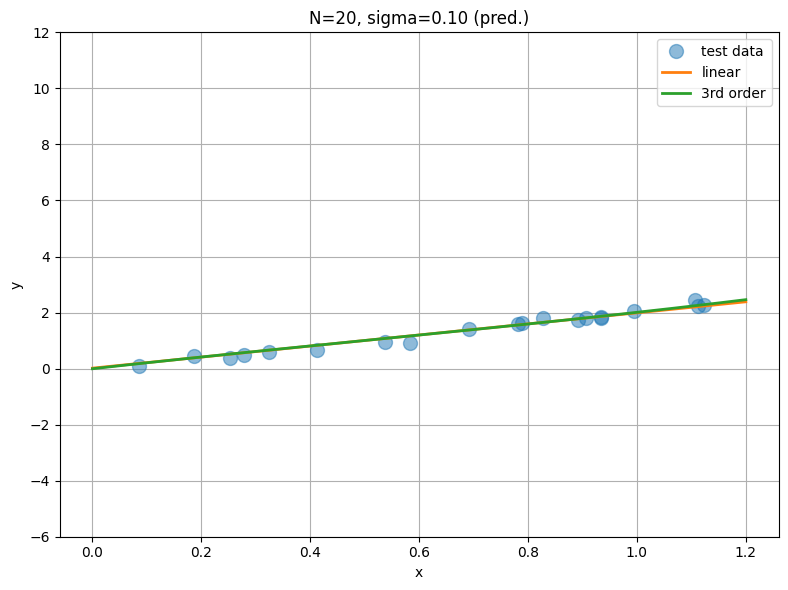

In [6]:
# Generate Test Data
%matplotlib inline
# Number of test data
N_test=20
sigma_test=sigma_train

# Generate random grid points (x) in the interval [0, max_x]:
# Note some points will be drawn outside the training interval
max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
y_test=2*x_test+s_test

# Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
Title="N=%i, sigma=%.2f"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

# Linear Filename
filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

Compare the results for linear and 3rd order with Gaussian noise and without Gaussian noise.
Can you figure out how to get a quantitative estimate of the MSE after the training has concluded?

# Example using Pytorch machine learning package

The linear regression can also be implemented using a simple neural network, whose nodes are simple linear operators.
In the example below, we use `pytorch` to set up the NN and train it on the sample data.
You may see some unfamiliar functions and terms here: train, loss, optimizer, epoch.
These will be covered in detail in future lectures.

In [7]:
#Adapted from https://medium.com/data-science/linear-regression-with-pytorch-eb6dedead817
import torch
from torch.autograd import Variable

In [8]:
x_data = Variable(torch.Tensor([[xvalue] for xvalue in x]))
y_data = Variable(torch.Tensor([[yvalue] for yvalue in y]))

We had to change the training data type to work with `pytorch`.
In this case it really is important to check the shape of the dataset because we changed it from the original shape and type.

In [9]:
x_data, y_data

(tensor([[0.0500],
         [0.0509],
         [0.0518],
         [0.0527],
         [0.0536],
         [0.0545],
         [0.0554],
         [0.0563],
         [0.0572],
         [0.0581],
         [0.0590],
         [0.0599],
         [0.0608],
         [0.0617],
         [0.0626],
         [0.0635],
         [0.0644],
         [0.0653],
         [0.0662],
         [0.0671],
         [0.0680],
         [0.0689],
         [0.0698],
         [0.0707],
         [0.0716],
         [0.0725],
         [0.0734],
         [0.0743],
         [0.0752],
         [0.0761],
         [0.0770],
         [0.0779],
         [0.0788],
         [0.0797],
         [0.0806],
         [0.0815],
         [0.0824],
         [0.0833],
         [0.0842],
         [0.0851],
         [0.0860],
         [0.0869],
         [0.0878],
         [0.0887],
         [0.0896],
         [0.0905],
         [0.0914],
         [0.0923],
         [0.0932],
         [0.0941],
         [0.0950],
         [0.0959],
         [0.

In [10]:
class LinearRegressionModel(torch.nn.Module):

    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [11]:
our_model = LinearRegressionModel()

In [12]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.1)

In [13]:
for epoch in range(500):

    # Forward pass: Compute predicted y by passing
    # x to the model
    pred_y = our_model(x_data)

    # Compute and print loss
    loss = criterion(pred_y, y_data)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.9147897958755493
epoch 1, loss 0.5298991799354553
epoch 2, loss 0.3147093653678894
epoch 3, loss 0.19426509737968445
epoch 4, loss 0.12672077119350433
epoch 5, loss 0.08871529996395111
epoch 6, loss 0.06720679998397827
epoch 7, loss 0.054914213716983795
epoch 8, loss 0.04777268320322037
epoch 9, loss 0.04351271316409111
epoch 10, loss 0.040867265313863754
epoch 11, loss 0.03912883624434471
epoch 12, loss 0.0379023477435112
epoch 13, loss 0.03696709871292114
epoch 14, loss 0.03619977459311485
epoch 15, loss 0.0355314239859581
epoch 16, loss 0.03492342308163643
epoch 17, loss 0.034354113042354584
epoch 18, loss 0.033811308443546295
epoch 19, loss 0.03328808397054672
epoch 20, loss 0.032780468463897705
epoch 21, loss 0.032286178320646286
epoch 22, loss 0.03180379047989845
epoch 23, loss 0.031332459300756454
epoch 24, loss 0.030871596187353134
epoch 25, loss 0.030420787632465363
epoch 26, loss 0.029979702085256577
epoch 27, loss 0.02954808808863163
epoch 28, loss 0.02912570

The training concludes after a certain number of training epochs. Then we can evaluate the performance of the regression network on our dataset.

- Will it accurately predict the value of an in-training data point?
- Will it accurately predict the value of an out-of-training data point?


In [14]:
new_var = Variable(torch.Tensor([[0.5]]))
pred_y = our_model(new_var)
print("predict (after training)", 0.5, our_model(new_var).item())

predict (after training) 0.5 1.002676010131836


In [15]:
new_var = Variable(torch.Tensor([[2.0]]))
pred_y = our_model(new_var)
print("predict (after training)", 2.0, our_model(new_var).item())

predict (after training) 2.0 3.957935333251953


You may be surprised that the fancy neural network package doesn't learn this simple function very well!

What model has the NN learned? We can map it out by trying different points from the training sample and extrapolating.

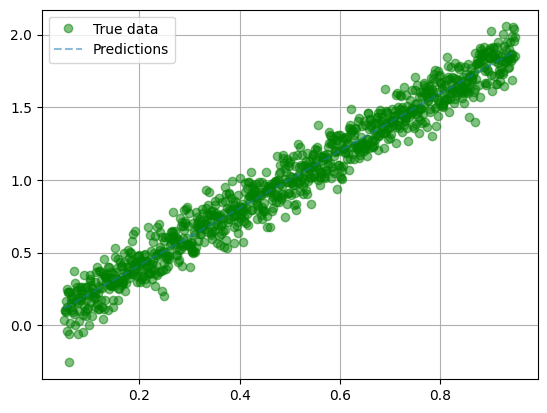

In [16]:
predicted = our_model(x_data)

plt.plot(x_data, y_data, 'go', label='True data', alpha=0.5)
plt.plot(x_data, Variable(predicted), '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.grid()
plt.show()

Can you think of a better way for the `pytorch` NN to learn this function?
Would it help to have more data points or